## Shankar Wagh

Task 1 - Prediction Using Unsupervised Machine Learning(ML)

## Importing Libraries

In [1]:
import numpy as np   # for numerical computation
import pandas as pd   # for data manipulation
import matplotlib.pyplot as plt  # for data visualization 

from sklearn import datasets   # sklearn datasets
from sklearn.cluster import KMeans  # for clustering import kmeans

## Load Dataset

In [2]:
# Load dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
# create copy of data
iris_data = iris_df
# view five rows using head method
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Checking Null value

In [3]:
# check null value
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [4]:
# cheching information of data
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
# describe data and see 5 number summary
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Find Optimal Number of Cluster

In [6]:
# create x variable and store data in array format
x = iris_data.values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# wcss - within cluster sum of squares
# wcss is the sum of squared distance between each point and the centroid 
# in a cluster
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print(wcss)

[681.3706, 152.34795176035792, 78.85144142614601, 57.228473214285714, 46.472230158730156, 39.03998724608725, 34.299712121212124, 30.063110617452725, 28.27172172856384, 26.094324740540415, 24.74251725970109]


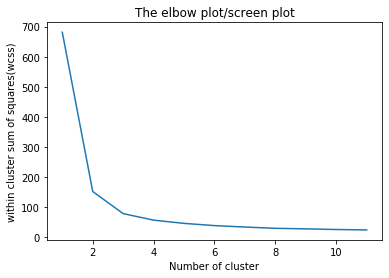

In [8]:
# Plotting the wcss
plt.plot(range(1,12),wcss)
plt.title('The elbow plot/screen plot')
plt.xlabel('Number of cluster')
plt.ylabel('within cluster sum of squares(wcss)')
plt.show()

__The optimum clusters is where the elbow occurs.__

__This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration__

__From this we choose the number of clusters as ** 3 **.__

In [9]:
# Applying kmeans to our dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, random_state = 0)
y_means = kmeans.fit_predict(x)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [10]:
# create cluster dataframe using y_means
cluster = pd.DataFrame(y_means)
# Add new variable as cluster and assign cluster dataframe
iris_data['cluster'] = cluster
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


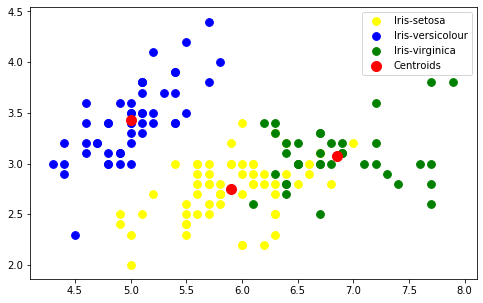

In [11]:
# Visualizing this cluster
plt.figure(figsize = (8,5))

plt.scatter(x[y_means == 0,0], x[y_means == 0,1],
            s = 60, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1],
            s = 60, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1],
            s = 60, c = 'green', label = 'Iris-virginica')

# plotting centroid of the cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'red', label = 'Centroids')
# plt.grid()
plt.legend()